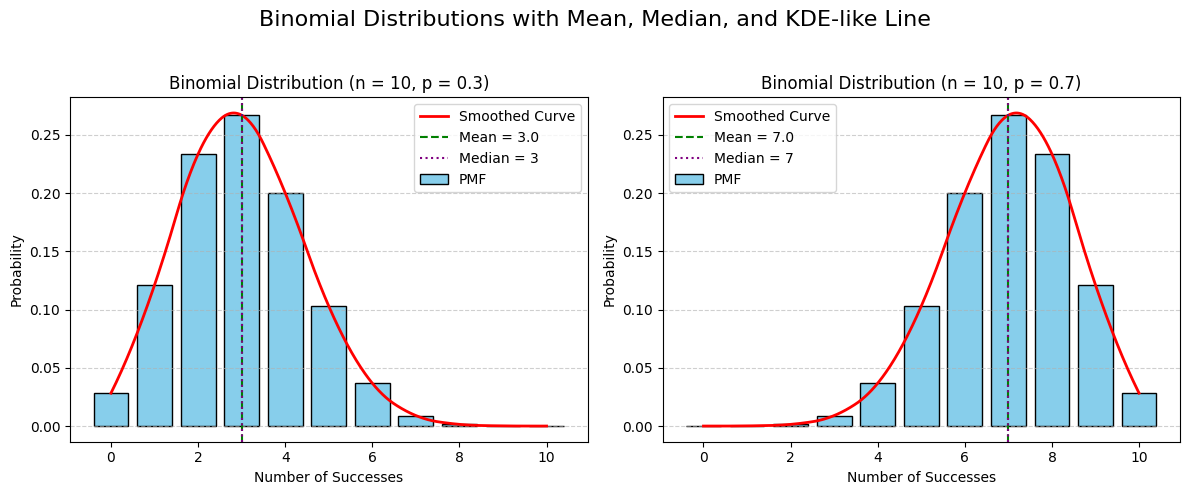

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.interpolate import make_interp_spline

# Re-plot with mean and median lines added
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Binomial Distributions with Mean, Median, and KDE-like Line', fontsize=16)

# Binomial parameters
binomial_ps = [0.3, 0.7]
n = 10

for i, p in enumerate(binomial_ps):
    x = np.arange(0, n+1)
    y = binom.pmf(x, n, p)
    ax = axes[i]

    # Bar plot
    ax.bar(x, y, color='skyblue', edgecolor='black', label='PMF' )

    # Smooth KDE-like curve
    x_smooth = np.linspace(x.min(), x.max(), 500)
    spline = make_interp_spline(x, y, k=2)
    y_smooth = spline(x_smooth)
    ax.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Smoothed Curve')

    # Mean and Median
    mean = n * p
    median = np.floor((n +1) * p)
    ax.axvline(mean, color='green', linestyle='--', label=f'Mean = {mean:.1f}')
    ax.axvline(median, color='purple', linestyle=':', label=f'Median = {int(median)}')

    ax.set_title(f'Binomial Distribution (n = {n}, p = {p})')
    ax.set_xlabel('Number of Successes')
    ax.set_ylabel('Probability')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()